In [1]:
from PIL import Image
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
def reduce_image_size(input_path, output_path, quality=85, optimize=True, format='JPEG'):
    """
    Reduce the file size of an image without changing its resolution.

    Parameters:
    - input_path (str): Path to the input image file.
    - output_path (str): Path to save the compressed image.
    - quality (int): Compression quality (0 to 100). Higher values result in better quality but larger file sizes.
    - optimize (bool): Whether to apply additional optimizations to reduce file size.

    Returns:
    - None
    """
    # Open the image file
    with Image.open(input_path) as img:
        if format == 'JPEG':
            rgb_img = img.convert('RGB')
            # Save the image with reduced quality and optimization
            rgb_img.save(output_path, quality=quality, optimize=optimize, format=format)
        elif format == "PNG":
            img.save(output_path, quality=quality, optimize=optimize, format=format)
        else:
            print("Error: Action for format is not defined.")

In [3]:
# input_image_path = r'./samples/Europe/jnq7pZRo5ezsdSnHS-SfmQ.png'
# output_image_path = r'./samples/Europe/jnq7pZRo5ezsdSnHS-SfmQ_res.png'

# reduce_image_size(input_image_path, output_image_path, quality=50)

In [4]:
def convert_pngs_to_jpeg(input_directory, output_directory, quality=25, format='JPEG'):
    """
    Convert all PNG images in a directory to JPEG format.

    Parameters:
    - input_directory (str): Path to the input directory containing PNG images.
    - output_directory (str): Path to save the converted JPEG images.
    - quality (int): Compression quality (0 to 100). Higher values result in better quality but larger file sizes.

    Returns:
    - None
    """
    # Ensure the output directory exists
    os.makedirs(output_directory, exist_ok=True)

    # Iterate through all files in the input directory
    for filename in os.listdir(input_directory):
        input_path = os.path.join(input_directory, filename)

        # Check if the file is a PNG image
        if os.path.isfile(input_path) and filename.lower().endswith('.jpg'):
            output_path = os.path.join(output_directory, os.path.splitext(filename)[0] + '.jpg')
            
            # Convert the PNG image to JPEG
            reduce_image_size(input_path, output_path, quality=quality, format = format)

In [5]:
# DONT USE THIS, UNLESS YOU WANT TO PERFORM AGAIN THE FILE REDUCTION!

# dir = './val/images/'
# out_dir = './val/reduced/'
# quality = 25

# convert_pngs_to_jpeg(dir, out_dir, quality)

In [6]:
filename = '--48MAqc82-bZdgGpaiexA.json'
folder_path = './annot/mtsd_v2_fully_annotated/annotations/'
data = []
if filename.endswith('.json'):
        # Read the content of the .json file
        with open(os.path.join(folder_path, filename)) as f:
            json_data = json.load(f)

        # Extract information from the json_data
        name = os.path.splitext(filename)[0]+'.png'  # Get the file name without the extension
        
         # Initialize lists to store information for each object
        classes = []
        widths, heights = [], []
        xmins, ymins, xmaxs, ymaxs = [], [], [], []

        # Loop through each object in the 'objects' field
        for obj in json_data['objects']:
            label = obj['label']
            bbox = obj['bbox']
            xmin, ymin, xmax, ymax = bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']
            widths.append(json_data['width']), heights.append(json_data['height'])
            # Append object information to the lists
            classes.append(label)
            xmins.append(xmin)
            ymins.append(ymin)
            xmaxs.append(xmax)
            ymaxs.append(ymax)

        # Create a single row for the JSON file
        row_data = [name, widths, heights, classes, xmins, ymins, xmaxs, ymaxs]
        data.append(row_data)

# Create a DataFrame from the list of data
columns = ['name', 'width', 'height', 'classes', 'xmins', 'ymins', 'xmaxs', 'ymaxs']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df

,name,width,height,classes,xmins,ymins,xmaxs,ymaxs
0,--48MAqc82-bZdgGpaiexA.png,"[4160, 4160]","[3120, 3120]","[other-sign, other-sign]","[2657.890625, 2641.640625]","[1013.0859375, 1028.3203125]","[2695.46875, 2683.28125]","[1051.171875, 1064.12109375]"


In [7]:
# Define the base folder containing subfolders
base_folder = './'

# Subfolders for images and annotations
image_subfolders = ['test/reduced', 'val/reduced', 'train_0/reduced', 'train_1/reduced', 'train_2/reduced']
annotation_subfolder = 'annot/mtsd_v2_fully_annotated/annotations'

# Initialize an empty list to store data
data = []

# Iterate over each image subfolder
for image_subfolder in image_subfolders:
    # Path to the folder containing .jpg files
    image_folder = os.path.join(base_folder, image_subfolder)

    for image_filename in os.listdir(image_folder):
        if image_filename.endswith('.jpg'):
            # Extract information from the image file name
            name = os.path.splitext(image_filename)[0]  # Get the file name without the extension

            # Path to the corresponding annotations folder
            annotation_folder = os.path.join(base_folder, annotation_subfolder)

            # Path to the corresponding .json file
            json_filename = name + '.json'
            json_filepath = os.path.join(annotation_folder, json_filename)

            # Check if the corresponding .json file exists
            if os.path.exists(json_filepath):
                # Read the content of the .json file
                with open(json_filepath) as f:
                    json_data = json.load(f)
                width = json_data['width']
                height = json_data['height']    

                # Loop through each object in the 'objects' field
                for obj in json_data['objects']:
                    label = obj['label']
                    bbox = obj['bbox']
                    xmin, ymin, xmax, ymax = bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']
                    

                # Create a single row for the JSON file
                    row_data = [name, width, height, label, xmin, ymin, xmax, ymax]
                    data.append(row_data)

# Create a DataFrame from the list of data
columns = ['name', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
df_raw = pd.DataFrame(data, columns=columns)
df_raw

,name,width,height,class,xmin,ymin,xmax,ymax
0,--48MAqc82-bZdgGpaiexA,4160,3120,other-sign,2657.890625,1013.085938,2695.468750,1051.171875
1,--48MAqc82-bZdgGpaiexA,4160,3120,other-sign,2641.640625,1028.320312,2683.281250,1064.121094
2,-0VXKtcnkYsZ9j-haB0PJw,1280,720,complementary--chevron-left--g5,610.937500,354.726562,650.000000,390.761719
3,-0VXKtcnkYsZ9j-haB0PJw,1280,720,complementary--chevron-left--g5,554.062500,368.789062,578.437500,388.828125
4,-0VXKtcnkYsZ9j-haB0PJw,1280,720,complementary--chevron-left--g5,540.000000,372.656250,554.062500,387.949219
...,...,...,...,...,...,...,...,...
206381,z__Me7KoP05iofqCOkYctQ,4032,3024,warning--curve-left--g2,1368.281250,1714.289062,1571.062500,1921.007812
206382,z__Me7KoP05iofqCOkYctQ,4032,3024,other-sign,3394.125000,1864.160156,3502.406250,1966.042969
206383,z__Me7KoP05iofqCOkYctQ,4032,3024,other-sign,3072.234375,1922.484375,3121.453125,1981.546875
206384,z__Me7KoP05iofqCOkYctQ,4032,3024,other-sign,2288.671875,1897.382812,2311.312500,1930.605469


In [8]:
# Define the base folder containing subfolders
base_folder = './'

# Subfolders for images and annotations
image_subfolders = ['test/reduced', 'val/reduced', 'train_0/reduced', 'train_1/reduced', 'train_2/reduced']
annotation_subfolder = 'annot/mtsd_v2_fully_annotated/annotations'

# Initialize an empty list to store data
data = []

# Iterate over each image subfolder
for image_subfolder in image_subfolders:
    # Path to the folder containing .jpg files
    image_folder = os.path.join(base_folder, image_subfolder)

    for image_filename in os.listdir(image_folder):
        if image_filename.endswith('.jpg'):
            # Extract information from the image file name
            name = os.path.splitext(image_filename)[0]  # Get the file name without the extension

            # Path to the corresponding annotations folder
            annotation_folder = os.path.join(base_folder, annotation_subfolder)

            # Path to the corresponding .json file
            json_filename = name + '.json'
            json_filepath = os.path.join(annotation_folder, json_filename)

            # Check if the corresponding .json file exists
            if os.path.exists(json_filepath):
                # Read the content of the .json file
                with open(json_filepath) as f:
                    json_data = json.load(f)

                # Extract information from the json_data
                widths, heights = [], []

                # Initialize lists to store information for each object
                classes = []
                xmins, ymins, xmaxs, ymaxs = [], [], [], []

                # Loop through each object in the 'objects' field
                for obj in json_data['objects']:
                    label = obj['label']
                    bbox = obj['bbox']
                    xmin, ymin, xmax, ymax = bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']
                    widths.append(json_data['width']), heights.append(json_data['height'])
                    # Append object information to the lists
                    classes.append(label)
                    xmins.append(xmin)
                    ymins.append(ymin)
                    xmaxs.append(xmax)
                    ymaxs.append(ymax)

                # Create a single row for the JSON file
                row_data = [name, widths, heights, classes, xmins, ymins, xmaxs, ymaxs]
                data.append(row_data)

# Create a DataFrame from the list of data
columns = ['name', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df

,name,width,height,class,xmin,ymin,xmax,ymax
0,--48MAqc82-bZdgGpaiexA,"[4160, 4160]","[3120, 3120]","[other-sign, other-sign]","[2657.890625, 2641.640625]","[1013.0859375, 1028.3203125]","[2695.46875, 2683.28125]","[1051.171875, 1064.12109375]"
1,-0VXKtcnkYsZ9j-haB0PJw,"[1280, 1280, 1280, 1280]","[720, 720, 720, 720]","[complementary--chevron-left--g5, complementar...","[610.9375, 554.0625, 540.0, 515.3125]","[354.7265625, 368.7890625, 372.65625, 368.0859...","[650.0, 578.4375, 554.0625, 532.1875]","[390.76171875, 388.828125, 387.94921875, 393.3..."
2,-1CbHBwZ5qEz-uT8-RC3tw,"[4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128]","[3096, 3096, 3096, 3096, 3096, 3096, 3096, 3096]","[other-sign, regulatory--no-stopping--g15, inf...","[2183.9296875, 1161.0, 2189.9765625, 2062.9921...","[1369.6171875, 1742.255859375, 1482.99609375, ...","[2295.796875, 1202.3203125, 2290.7578125, 2143...","[1479.216796875, 1780.8046875, 1585.79296875, ..."
3,-1wBFPsc3vMaLzxMDgJkMA,"[3264, 3264, 3264]","[2448, 2448, 2448]","[complementary--one-direction-left--g1, other-...","[1809.703125, 1430.390625, 1573.828125]","[1325.00390625, 1270.6171875, 1308.26953125]","[1856.71875, 1445.53125, 1586.578125]","[1366.83984375, 1285.55859375, 1320.8203125]"
4,-2k5fP6nR3RmS7FfzwPNxg,"[4032, 4032, 4032, 4032, 4032, 4032, 4032, 4032]","[3024, 3024, 3024, 3024, 3024, 3024, 3024, 3024]","[regulatory--one-way-right--g3, regulatory--st...","[3912.890625, 1078.875, 3398.0625, 3503.390625...","[1356.9609375, 1345.1484375, 1503.87890625, 15...","[4030.03125, 1108.40625, 3468.9375, 3527.01562...","[1439.6484375, 1437.43359375, 1583.61328125, 1..."
...,...,...,...,...,...,...,...,...
41904,z_pZfxOg8K12UE2vigNSRw,"[1920, 1920]","[1080, 1080]","[other-sign, other-sign]","[819.84375, 824.0625]","[668.14453125, 686.337890625]","[838.125, 835.3125]","[686.6015625, 694.51171875]"
41905,z_qmOxsaswiacWhxbR2pLQ,"[1920, 1920, 1920]","[1080, 1080, 1080]","[other-sign, other-sign, other-sign]","[855.46875, 1181.25, 890.625]","[620.419921875, 682.3828125, 664.453125]","[1037.34375, 1219.21875, 942.1875]","[654.169921875, 739.3359375, 686.6015625]"
41906,z_Tb5W31HZrP9tbHvTVghQ,"[3264, 3264, 3264, 3264, 3264, 3264]","[2448, 2448, 2448, 2448, 2448, 2448]","[other-sign, other-sign, warning--school-zone-...","[1152.28125, 2071.078125, 3005.8125, 2926.125,...","[1207.265625, 1191.12890625, 1085.34375, 1177....","[1205.671875, 2112.515625, 3063.984375, 2955.6...","[1261.65234375, 1238.34375, 1151.0859375, 1216..."
41907,z_ZjQMK9bLTJy5U-y17oNg,[4000],[3000],[other-sign],[3002.9296875],[1187.255859375],[3242.1875],[1554.931640625]


In [9]:
# Extract unique label names from the 'classes' column
unique_labels = df['class'].explode().unique()

# Print the unique label names
print(unique_labels)

['other-sign' 'complementary--chevron-left--g5'
 'information--motorway--g1' 'regulatory--no-stopping--g15'
 'information--pedestrians-crossing--g1'
 'warning--railroad-crossing-without-barriers--g3'
 'regulatory--go-straight-or-turn-right--g1'
 'regulatory--one-way-straight--g1' 'complementary--go-right--g1'
 'complementary--one-direction-left--g1' 'regulatory--one-way-right--g3'
 'regulatory--stop--g1' 'regulatory--turn-left--g1'
 'warning--junction-with-a-side-road-perpendicular-right--g3'
 'regulatory--maximum-speed-limit-60--g1'
 'regulatory--maximum-speed-limit-100--g1'
 'warning--double-curve-first-right--g1' 'warning--trail-crossing--g2'
 'complementary--keep-left--g1' 'regulatory--maximum-speed-limit-40--g3'
 'regulatory--priority-road--g4' 'regulatory--keep-right--g1'
 'regulatory--maximum-speed-limit-30--g1' 'regulatory--no-stopping--g2'
 'complementary--chevron-right--g1' 'warning--other-danger--g1'
 'regulatory--no-parking--g1' 'warning--turn-right--g1'
 'complementary--ex

In [10]:
len(unique_labels)

402

372416.49627685547
1686878.2814941406
339871.3193664551
227194.74645996094
910738.2442016602
564286.7125854492
129106.35681152344
108329.58984375
205885.546875
237112.37182617188
49867.36317443848
273010.7010498047
103701.69854736328
371322.11920166016
229285.95542907715
80087.36572265625
174268.8720703125
289029.8366546631
105133.92626953125
92755.79452514648
336376.42822265625
364468.0083618164
493469.1232910156
100533.15856933594
298011.30294799805
311533.92333984375
149765.783203125
197561.09619140625
34534.951171875
108303.01666259766
94656.14318847656
92907.80255126953
349905.71365356445
73857.70407485962
134114.0625
188262.19171142578
294777.4652709961
183804.82917022705
129063.02449703217
224854.37622070312
123587.39685058594
100609.35974121094
181448.02880859375
164163.111328125
117079.74243164062
255948.17431640625
315407.5927734375
178983.73828125
52097.48547363281
115083.8003540039
45016.79479980469
306105.2490234375
137546.54296875
245154.41015625
49654.58203125
52591.9892

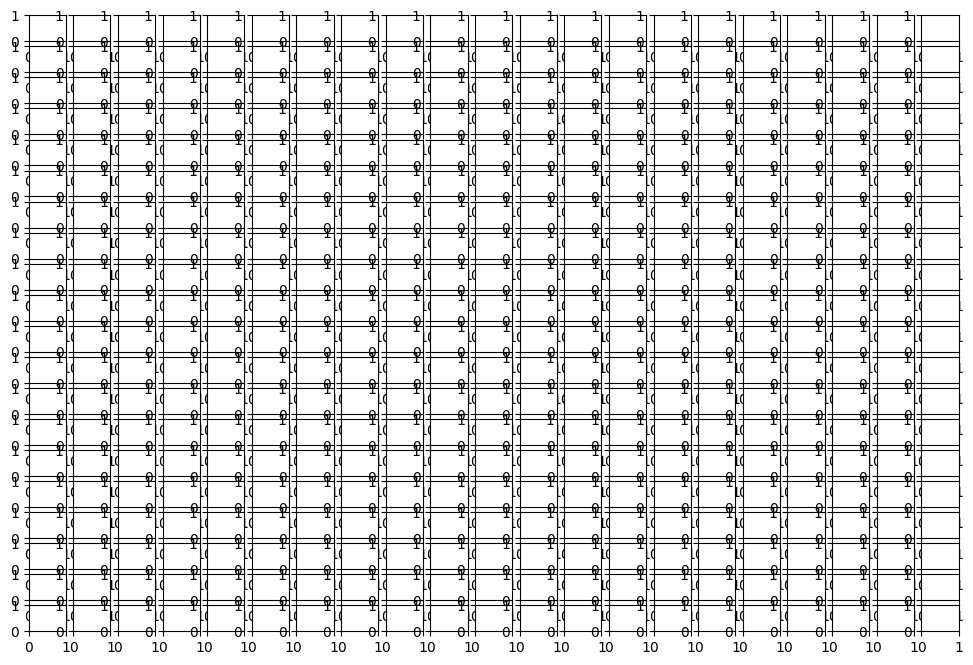

In [25]:
# Assuming df is the DataFrame obtained previously
# Assuming base_folder is the path to the base folder containing subfolders

# Extract unique label names from the 'classes' column
unique_labels = df_raw['class'].explode().unique()

# Iterate over unique labels
for i, label in enumerate(unique_labels):
    min_area_threshold = 300000  # Adjust the minimum area as needed
    fig, axs = plt.subplots(figsize=(12, 8))
     # Flag to indicate if a suitable image is found
    suitable_image_found = False
    A = 1
    while A:
        # Iterate over example rows with the current label until a suitable image is found
        for _, example_row in df_raw[df_raw['class'].apply(lambda x: label in x)].iterrows():
            name = example_row['name']

            for image_subfolder in image_subfolders:
                image_path = os.path.join(base_folder, image_subfolder, f"{name}.jpg")
                if os.path.exists(image_path):
                    break  # Exit the loop if the image is found in the current subfolder

            width, height = example_row['width'], example_row['height']
            xmins, ymins, xmaxs, ymaxs = (
                example_row['xmin'],
                example_row['ymin'],
                example_row['xmax'],
                example_row['ymax'],
            )

            # Calculate the area of the bounding box
            area = (xmaxs - xmins) * (ymaxs - ymins)

            # Check if the area is greater than the minimum threshold
            if area > min_area_threshold:
                print(area)
                suitable_image_found = True
                A = 0
                # Load the image and resize it for display
                img = Image.open(image_path)
                # img = img.resize((150, 150))  # Adjust the size as needed

                # Plot rectangles for both object bounding box and specified bounding box

                rect_obj = Rectangle((xmins, ymins), xmaxs - xmins, ymaxs - ymins, 
                                    linewidth=2, edgecolor='r', facecolor='none')

                axs.add_patch(rect_obj)

                axs.imshow(img)
                axs.set_title(f"Label: {label}")
                axs.axis('off')

                plt.savefig('./classes/class_'+label+'.png', dpi = 150)
                plt.close(fig)
                break

        # Hide any remaining empty subplots
        if not suitable_image_found:
            min_area_threshold /= 1.2


# plt.tight_layout()
# plt.show()


In [ ]:
plt.savefig('classes.png', dpi = 3000)

In [65]:
unique_labels

array(['other-sign', 'complementary--chevron-left--g5',
       'information--motorway--g1', 'regulatory--no-stopping--g15',
       'information--pedestrians-crossing--g1',
       'warning--railroad-crossing-without-barriers--g3',
       'regulatory--go-straight-or-turn-right--g1',
       'regulatory--one-way-straight--g1', 'complementary--go-right--g1',
       'complementary--one-direction-left--g1',
       'regulatory--one-way-right--g3', 'regulatory--stop--g1',
       'regulatory--turn-left--g1',
       'warning--junction-with-a-side-road-perpendicular-right--g3',
       'regulatory--maximum-speed-limit-60--g1',
       'regulatory--maximum-speed-limit-100--g1',
       'warning--double-curve-first-right--g1',
       'warning--trail-crossing--g2', 'complementary--keep-left--g1',
       'regulatory--maximum-speed-limit-40--g3',
       'regulatory--priority-road--g4', 'regulatory--keep-right--g1',
       'regulatory--maximum-speed-limit-30--g1',
       'regulatory--no-stopping--g2', 'com

372416.49627685547


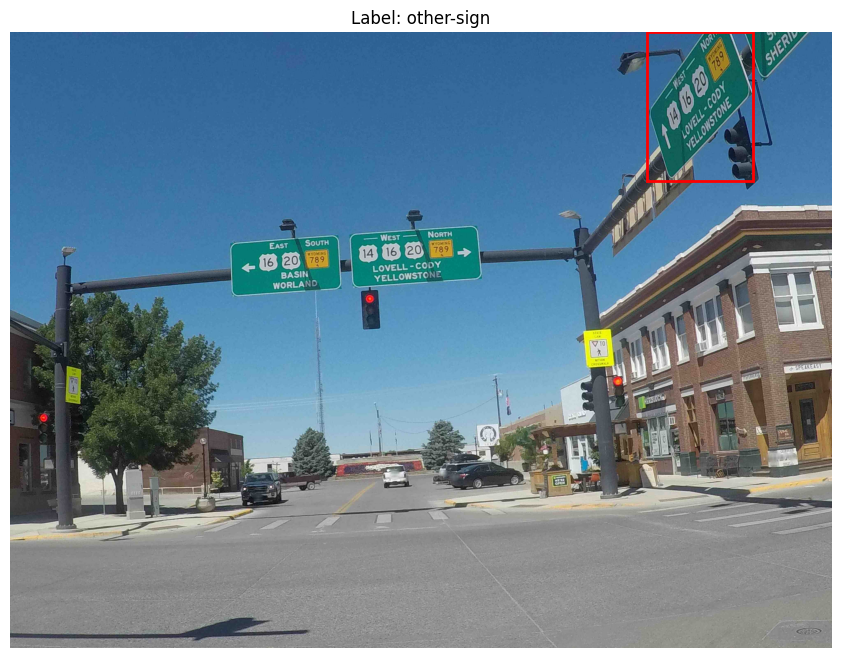

In [19]:
min_area_threshold = 300000  # Adjust the minimum area as needed
fig, axs = plt.subplots(figsize=(12, 8))
# Iterate over unique labels
for i, label in enumerate(['other-sign']):
    # Flag to indicate if a suitable image is found
    suitable_image_found = False

    # Iterate over example rows with the current label until a suitable image is found
    for _, example_row in df_raw[df_raw['class'].apply(lambda x: label in x)].iterrows():
        name = example_row['name']

        for image_subfolder in image_subfolders:
            image_path = os.path.join(base_folder, image_subfolder, f"{name}.jpg")
            if os.path.exists(image_path):
                break  # Exit the loop if the image is found in the current subfolder

        width, height = example_row['width'], example_row['height']
        xmins, ymins, xmaxs, ymaxs = (
            example_row['xmin'],
            example_row['ymin'],
            example_row['xmax'],
            example_row['ymax'],
        )

        # Calculate the area of the bounding box
        area = (xmaxs - xmins) * (ymaxs - ymins)

        # Check if the area is greater than the minimum threshold
        if area > min_area_threshold:
            print(area)
            suitable_image_found = True



            # Load the image and resize it for display
            img = Image.open(image_path)
            # img = img.resize((150, 150))  # Adjust the size as needed

            # Plot rectangles for both object bounding box and specified bounding box

            rect_obj = Rectangle((xmins, ymins), xmaxs - xmins, ymaxs - ymins, 
                                linewidth=2, edgecolor='r', facecolor='none')
            axs.add_patch(rect_obj)

            # Plot the specified bounding box (xmin, ymin, xmax, ymax)

            axs.imshow(img)
            axs.set_title(f"Label: {label}")
            axs.axis('off')
            break